In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

In [3]:
### Load Data and Set up Data Frame ###

df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')

# Extreme dates for the continuous well data
min_date = datetime(2006,2,7)
max_date = datetime(2017,6,6)

# Restrict data to those dates
df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()

# Drop 'date' column
df.drop(columns = ['date'])

# Set Date Range
date_rng = pd.date_range(start='2006-02-07', end='2017-06-06', freq='D')

# Set the index to be the DatetimeIndex
df.index = date_rng

# Check Freq (should be 'Day')
df.index.freq

<Day>

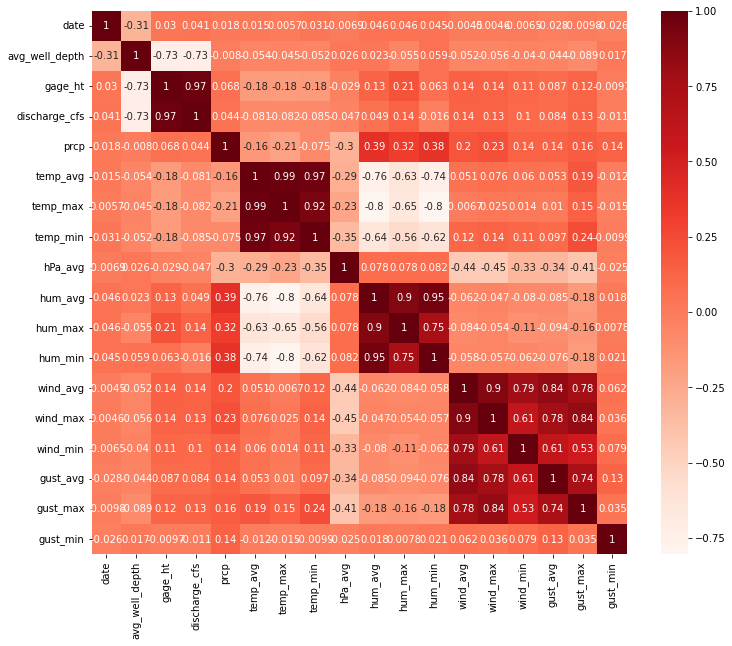

In [4]:
### Correlation Plot
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()